<a href="https://colab.research.google.com/github/Jiacheng1216/Tensorflow2.0/blob/master/LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [ ]:
train_split, valid_split = ['train[:90%]', 'train[90%:]']
train_data, info = tfds.load("cifar10", split=train_split, with_info=True)
valid_data = tfds.load("cifar10", split=valid_split)
test_data = tfds.load("cifar10", split="test")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteJBPS5D/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteJBPS5D/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)



In [ ]:
labels_dict = dict(enumerate(info.features['label'].names))
labels_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [ ]:
train_dict = {}
for data in train_data:
    label = data['label'].numpy()
    train_dict[label] = train_dict.setdefault(label, 0) + 1
print(train_dict)

{7: 4500, 8: 4456, 4: 4497, 6: 4505, 5: 4503, 2: 4522, 9: 4453, 3: 4526, 0: 4530, 1: 4508}


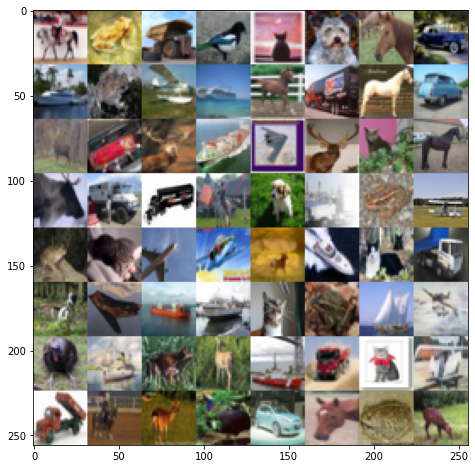

In [ ]:
output = np.zeros((32 * 8, 32 * 8, 3), dtype=np.uint8)
row = 0
for data in train_data.batch(8).take(8):
    output[:, row*32:(row+1)*32] = np.vstack(data['image'].numpy())
    row += 1
plt.figure(figsize=(8, 8))
plt.imshow(output)

In [ ]:
def parse_fn(dataset):
    x = tf.cast(dataset['image'], tf.float32) 
    y = tf.one_hot(dataset['label'], 10)
    return x, y

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  
batch_size = 64  
train_num = int(info.splits['train'].num_examples / 10) * 9 

train_data = train_data.shuffle(train_num)  
train_data = train_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10, activation='softmax')(x) 
model_1 = keras.Model(inputs, outputs, name='model-1')
model_1.summary()  

Model: "model-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0   

In [ ]:
model_dir = 'drive/MyDrive/lab4-logs/models' 
os.makedirs(model_dir)

In [ ]:
log_dir = os.path.join('drive/MyDrive/lab4-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir='lab4-logs/model-1')
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.hdf5', 
                                             monitor='val_categorical_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

In [ ]:
model_1.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=100, 
                        validation_data=valid_data,
                        callbacks=[model_cbk, model_mckp])

Epoch 1/100
704/704 [==============================] - 5s 4ms/step - loss: 2.6678 - categorical_accuracy: 0.0995 - val_loss: 2.3027 - val_categorical_accuracy: 0.0984
Epoch 2/100
704/704 [==============================] - 2s 3ms/step - loss: 2.3030 - categorical_accuracy: 0.0976 - val_loss: 2.3030 - val_categorical_accuracy: 0.0994
Epoch 3/100
704/704 [==============================] - 2s 3ms/step - loss: 2.3028 - categorical_accuracy: 0.0990 - val_loss: 2.3034 - val_categorical_accuracy: 0.0948
Epoch 4/100
704/704 [==============================] - 3s 3ms/step - loss: 2.3028 - categorical_accuracy: 0.0999 - val_loss: 2.3032 - val_categorical_accuracy: 0.0940
Epoch 5/100
704/704 [==============================] - 2s 3ms/step - loss: 2.3029 - categorical_accuracy: 0.0989 - val_loss: 2.3031 - val_categorical_accuracy: 0.0986
Epoch 6/100
704/704 [==============================] - 2s 3ms/step - loss: 2.3028 - categorical_accuracy: 0.0994 - val_loss: 2.3030 - val_categorical_accuracy: 0.094

In [ ]:
loss, acc = model_1.evaluate(test_data)
print('\nModel-1 Accuracy: {}%'.format(acc))

157/157 [==============================] - 1s 6ms/step - loss: 2.3026 - categorical_accuracy: 0.1001

Model-1 Accuracy: 0.10010000318288803%


In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (3, 3), activation='relu')(inputs)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_2 = keras.Model(inputs, outputs, name='model-2')
model_2.summary() 

Model: "model-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         295040    
                                                           

In [ ]:
log_dir = os.path.join('drive/MyDrive/lab4-logs', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.hdf5', 
                                             monitor='val_categorical_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

In [ ]:
model_2.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
history_2 = model_2.fit(train_data,
                        epochs=100, 
                        validation_data=valid_data,
                        callbacks=[model_cbk, model_mckp])

Epoch 1/100
704/704 [==============================] - 13s 8ms/step - loss: 2.3886 - categorical_accuracy: 0.0989 - val_loss: 2.3029 - val_categorical_accuracy: 0.0956
Epoch 2/100
704/704 [==============================] - 5s 8ms/step - loss: 2.3027 - categorical_accuracy: 0.0979 - val_loss: 2.3028 - val_categorical_accuracy: 0.0948
Epoch 3/100
704/704 [==============================] - 5s 8ms/step - loss: 2.3027 - categorical_accuracy: 0.1002 - val_loss: 2.3029 - val_categorical_accuracy: 0.0940
Epoch 4/100
704/704 [==============================] - 6s 8ms/step - loss: 2.3027 - categorical_accuracy: 0.0980 - val_loss: 2.3029 - val_categorical_accuracy: 0.0948
Epoch 5/100
704/704 [==============================] - 5s 8ms/step - loss: 2.4561 - categorical_accuracy: 0.0984 - val_loss: 2.3031 - val_categorical_accuracy: 0.0952
Epoch 6/100
704/704 [==============================] - 5s 8ms/step - loss: 2.3038 - categorical_accuracy: 0.0986 - val_loss: 2.3030 - val_categorical_accuracy: 0.09

In [ ]:
loss, acc = model_2.evaluate(test_data)
print('\nModel-2 Accuracy: {}%'.format(acc))

157/157 [==============================] - 1s 4ms/step - loss: 2.3026 - categorical_accuracy: 0.1000

Model-2 Accuracy: 0.10000000149011612%


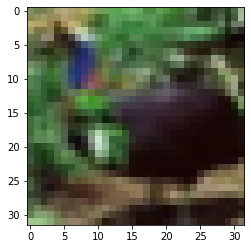

In [ ]:
x = 3
y = 7
image_test = output[y*32:(y+1)*32, x*32:(x+1)*32, :]
plt.imshow(image_test)

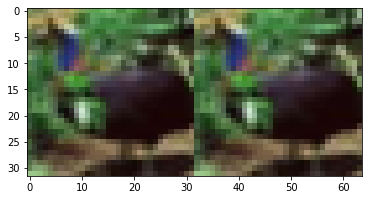

In [ ]:
def flip(x):
    x = tf.image.random_flip_left_right(x)  
    return x

image_2 = flip(image_test)
image = np.hstack((image_test, image_2))
plt.imshow(image)

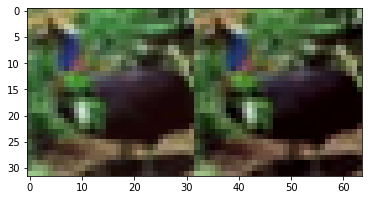

In [ ]:
def color(x):
    x = tf.image.random_hue(x, 0.08)  
    x = tf.image.random_saturation(x, 0.6, 1.6) 
    x = tf.image.random_brightness(x, 0.05)  
    x = tf.image.random_contrast(x, 0.7, 1.3)  
    return x


image_2 = color(image_test)
image = np.hstack((image_test, image_2))
plt.imshow(image)

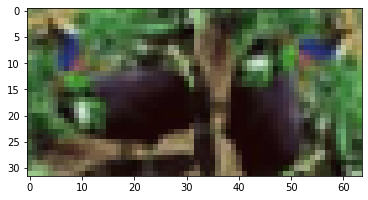

In [ ]:
def rotate(x):
    x = tf.image.rot90(x, tf.random.uniform(shape=[], minval=1, maxval=4, dtype=tf.int32))
    return x

image_2 = rotate(image_test)
image = np.hstack((image_test, image_2))
plt.imshow(image)

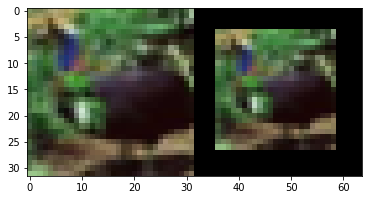

In [ ]:
def zoom(x, scale_min=0.6, scale_max=1.4):
    h, w, c = x.shape
    scale = tf.random.uniform([], scale_min, scale_max)  
    sh = h * scale
    sw = w * scale
    x = tf.image.resize(x, (sh, sw)) 
    x = tf.image.resize_with_crop_or_pad(x, h, w)  
    return x

image_2 = zoom(image_test)
image_2 = tf.cast(image_2, dtype=tf.uint8)
image = np.hstack((image_test, image_2)) 
plt.imshow(image)

In [ ]:
train_data = tfds.load("cifar10", split=train_split)

In [ ]:
def parse_aug_fn(dataset):
    x = tf.cast(dataset['image'], tf.float32) / 255.
    x = flip(x) 
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: color(x), lambda: x)
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.75, lambda: rotate(x), lambda: x)
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: zoom(x), lambda: x)
    y = tf.one_hot(dataset['label'], 10)
    return x, y

In [ ]:
train_data = train_data.shuffle(train_num)
train_data = train_data.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

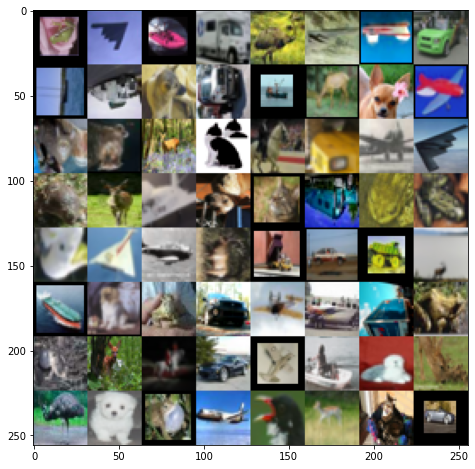

In [ ]:
for images, labels in train_data.take(1):
    images = images.numpy()
output = np.zeros((32 * 8, 32 * 8, 3))
for i in range(8):
    for j in range(8):
        output[i*32:(i+1)*32, j*32:(j+1)*32, :] = images[i*8+j]
plt.figure(figsize=(8, 8))
plt.imshow(output)

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (3, 3), activation='relu')(inputs)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_3 = keras.Model(inputs, outputs, name='model-3')
model_3.summary() 

Model: "model-3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 256)       295168    
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 128)         295040    
                                                           

In [ ]:
log_dir = os.path.join('drive/MyDrive/lab4-logs', 'model-3')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-3.hdf5', 
                                             monitor='val_categorical_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

In [ ]:
model_3.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
history_3 = model_3.fit(train_data,
                        epochs=100, 
                        validation_data=valid_data,
                        callbacks=[model_cbk, model_mckp])

Epoch 1/100
704/704 [==============================] - 6s 8ms/step - loss: 2.0696 - categorical_accuracy: 0.2158 - val_loss: 84.7087 - val_categorical_accuracy: 0.2204
Epoch 2/100
704/704 [==============================] - 6s 8ms/step - loss: 1.8760 - categorical_accuracy: 0.3061 - val_loss: 62.9791 - val_categorical_accuracy: 0.3076
Epoch 3/100
704/704 [==============================] - 6s 8ms/step - loss: 1.7542 - categorical_accuracy: 0.3574 - val_loss: 84.6648 - val_categorical_accuracy: 0.3122
Epoch 4/100
704/704 [==============================] - 6s 8ms/step - loss: 1.6490 - categorical_accuracy: 0.4029 - val_loss: 96.9751 - val_categorical_accuracy: 0.3460
Epoch 5/100
704/704 [==============================] - 6s 8ms/step - loss: 1.5790 - categorical_accuracy: 0.4299 - val_loss: 109.0958 - val_categorical_accuracy: 0.3344
Epoch 6/100
704/704 [==============================] - 6s 8ms/step - loss: 1.5268 - categorical_accuracy: 0.4561 - val_loss: 105.4271 - val_categorical_accurac

In [ ]:
loss, acc = model_3.evaluate(test_data)
print('\nModel-3 Accuracy: {}%'.format(acc))

157/157 [==============================] - 1s 4ms/step - loss: 95.4523 - categorical_accuracy: 0.5280

Model-3 Accuracy: 0.527999997138977%


In [ ]:
model_1.load_weights('drive/MyDrive/lab4-logs/models/Best-model-1.hdf5')
model_2.load_weights('drive/MyDrive/lab4-logs/models/Best-model-2.hdf5')
model_3.load_weights('drive/MyDrive/lab4-logs/models/Best-model-3.hdf5')
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss_3, acc_3 = model_3.evaluate(test_data)

157/157 [==============================] - 1s 4ms/step - loss: 99.2669 - categorical_accuracy: 0.5713


In [ ]:
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss_3, acc_3 = model_3.evaluate(test_data)

157/157 [==============================] - 1s 4ms/step - loss: 99.2669 - categorical_accuracy: 0.5713


In [ ]:
loss = [loss_1, loss_2, loss_3]  
acc = [acc_1, acc_2, acc_3]

dict = {"Loss": loss,  
        "Accuracy": acc}

df = pd.DataFrame(dict)
df

,Loss,Accuracy
0,2.302592,0.1001
1,2.302601,0.1000
2,99.266899,0.5713
